In [1]:
import pandas as pd
import numpy as np

In [3]:
fr = pd.read_csv("fr.csv")
fr.head()

,YEAR,NO_LIVE,CRUDE_BIRTH_RATE
0,1991,68281,12.0
1,1992,70949,12.3
2,1993,70451,12.0
3,1994,71646,11.9
4,1995,68637,11.2


In [5]:
ho = pd.read_csv("data-hou.csv")
ho.head()

,observation_date,QHKR628BIS
0,1979-10-01,46.7371
1,1980-01-01,49.4687
2,1980-04-01,48.7067
3,1980-07-01,51.8077
4,1980-10-01,56.1242


In [ ]:
ho.rename(columns={'','')

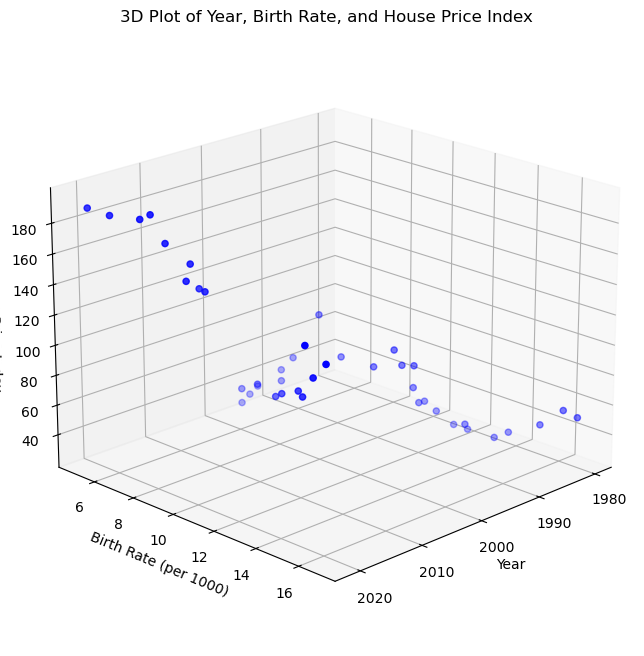

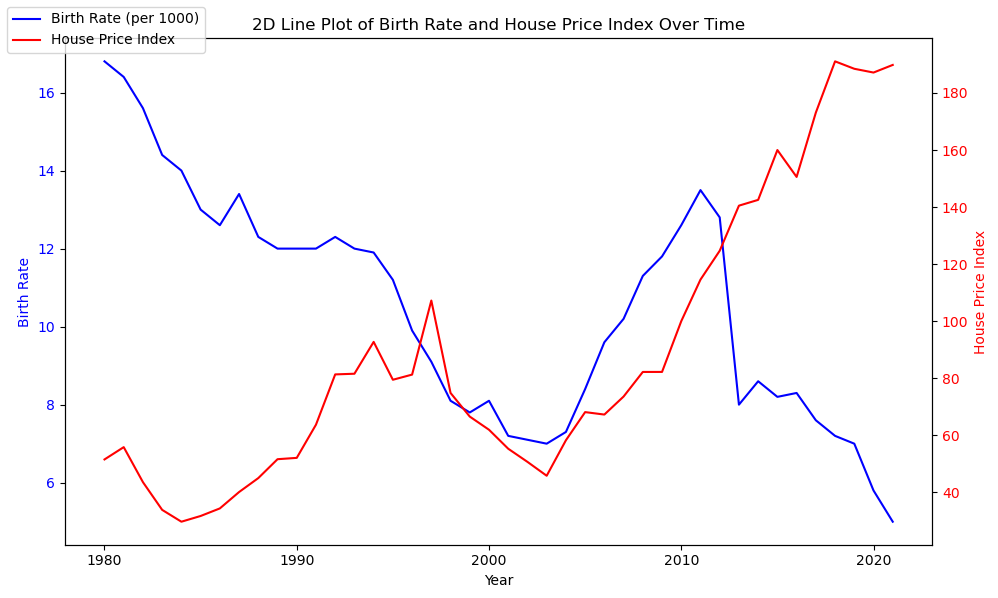

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Load first dataset: Birth rates
birth_data = {
    1980: 16.8, 1981: 16.4, 1982: 15.6, 1983: 14.4, 1984: 14, 1985: 13, 1986: 12.6, 
    1987: 13.4, 1988: 12.3, 1989: 12, 1990: 12, 1991: 12, 1992: 12.3, 1993: 12, 
    1994: 11.9, 1995: 11.2, 1996: 9.9, 1997: 9.1, 1998: 8.1, 1999: 7.8, 2000: 8.1, 
    2001: 7.2, 2002: 7.1, 2003: 7, 2004: 7.3, 2005: 8.4, 2006: 9.6, 2007: 10.2, 
    2008: 11.3, 2009: 11.8, 2010: 12.6, 0: 13.5, 2012: 12.8, 2013: 8, 2014: 8.6, 
    2015: 8.2, 2016: 8.3, 2017: 7.6, 2018: 7.2, 2019: 7, 2020: 5.8, 2021: 5
}
birth_data[2011] = birth_data.pop(0)  # Correct 2011 data

# Load second dataset: House price index
df = pd.read_csv('data-hou.csv')  # Assumes file name is hou-data.csv
df['observation_date'] = pd.to_datetime(df['observation_date'])  # Convert to datetime
df['year'] = df['observation_date'].dt.year  # Extract year

# Calculate yearly average for house price index
house_data_avg = df.groupby('year')['QHKR628BIS'].mean().to_dict()

# Extract data for common years
years = sorted(set(birth_data.keys()) & set(house_data_avg.keys()))
birth_rates = [birth_data[year] for year in years]
house_prices = [house_data_avg[year] for year in years]

# Create 3D plot
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Draw 3D scatter plot
ax_3d.scatter(years, birth_rates, house_prices, c='b', marker='o')

# Set axis labels
ax_3d.set_xlabel('Year')
ax_3d.set_ylabel('Birth Rate (per 1000)')
ax_3d.set_zlabel('House Price Index')

# Set title
ax_3d.set_title('3D Plot of Year, Birth Rate, and House Price Index')

# Adjust view angle (optional)
ax_3d.view_init(elev=20, azim=45)

# Create 2D line plot
fig_2d, ax_2d = plt.subplots(figsize=(10, 6))

# Plot birth rate and house price index as lines
ax_2d.plot(years, birth_rates, label='Birth Rate (per 1000)', color='blue')
ax_2d.set_xlabel('Year')
ax_2d.set_ylabel('Birth Rate', color='blue')
ax_2d.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for house price index
ax_2d_twin = ax_2d.twinx()
ax_2d_twin.plot(years, house_prices, label='House Price Index', color='red')
ax_2d_twin.set_ylabel('House Price Index', color='red')
ax_2d_twin.tick_params(axis='y', labelcolor='red')

# Add title and legend
ax_2d.set_title('2D Line Plot of Birth Rate and House Price Index Over Time')
fig_2d.legend(loc='upper left')

# Adjust layout to prevent overlap
fig_2d.tight_layout()

# Display both plots
plt.show()


Pearson Correlation Coefficient: -0.565
P-value: 0.000
Linear Regression: Birth Rate = -0.034 * House Price + 13.498
R-squared: 0.319
P-value (regression): 0.000


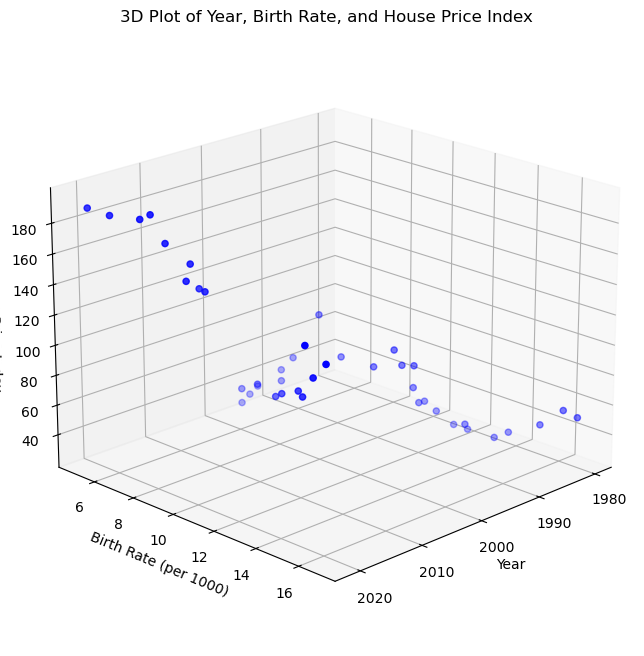

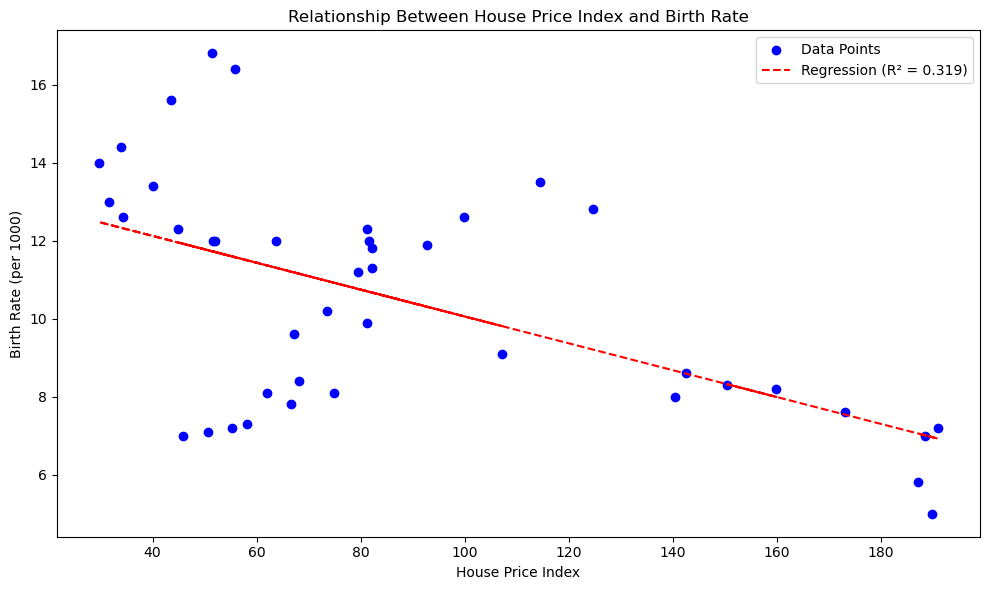

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, linregress

# Load first dataset: Birth rates
birth_data = {
    1980: 16.8, 1981: 16.4, 1982: 15.6, 1983: 14.4, 1984: 14, 1985: 13, 1986: 12.6, 
    1987: 13.4, 1988: 12.3, 1989: 12, 1990: 12, 1991: 12, 1992: 12.3, 1993: 12, 
    1994: 11.9, 1995: 11.2, 1996: 9.9, 1997: 9.1, 1998: 8.1, 1999: 7.8, 2000: 8.1, 
    2001: 7.2, 2002: 7.1, 2003: 7, 2004: 7.3, 2005: 8.4, 2006: 9.6, 2007: 10.2, 
    2008: 11.3, 2009: 11.8, 2010: 12.6, 0: 13.5, 2012: 12.8, 2013: 8, 2014: 8.6, 
    2015: 8.2, 2016: 8.3, 2017: 7.6, 2018: 7.2, 2019: 7, 2020: 5.8, 2021: 5
}
birth_data[2011] = birth_data.pop(0)  # Correct 2011 data

# Load second dataset: House price index
df = pd.read_csv('data-hou.csv')  # Assumes file name is hou-data.csv
df['observation_date'] = pd.to_datetime(df['observation_date'])  # Convert to datetime
df['year'] = df['observation_date'].dt.year  # Extract year

# Calculate yearly average for house price index
house_data_avg = df.groupby('year')['QHKR628BIS'].mean().to_dict()

# Extract data for common years
years = sorted(set(birth_data.keys()) & set(house_data_avg.keys()))
birth_rates = np.array([birth_data[year] for year in years])
house_prices = np.array([house_data_avg[year] for year in years])

# Statistical analysis
# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(birth_rates, house_prices)
print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

# Perform linear regression (house price as independent variable, birth rate as dependent variable)
slope, intercept, r_value, p_value_reg, std_err = linregress(house_prices, birth_rates)
print(f"Linear Regression: Birth Rate = {slope:.3f} * House Price + {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value (regression): {p_value_reg:.3f}")

# Create 3D plot
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')
ax_3d.scatter(years, birth_rates, house_prices, c='b', marker='o')
ax_3d.set_xlabel('Year')
ax_3d.set_ylabel('Birth Rate (per 1000)')
ax_3d.set_zlabel('House Price Index')
ax_3d.set_title('3D Plot of Year, Birth Rate, and House Price Index')
ax_3d.view_init(elev=20, azim=45)

# Create 2D scatter plot with regression line for birth rate vs house price
fig_2d, ax_2d = plt.subplots(figsize=(10, 6))

# Scatter plot of birth rate vs house price
ax_2d.scatter(house_prices, birth_rates, color='blue', label='Data Points')

# Add regression line
regression_line = slope * house_prices + intercept
ax_2d.plot(house_prices, regression_line, color='red', linestyle='--', label=f'Regression (R² = {r_value**2:.3f})')

ax_2d.set_xlabel('House Price Index')
ax_2d.set_ylabel('Birth Rate (per 1000)')
ax_2d.set_title('Relationship Between House Price Index and Birth Rate')
ax_2d.legend()

# Adjust layout
fig_2d.tight_layout()

# Display plots
plt.show()


Polynomial Regression (degree=2) R-squared: 0.322
SVR (RBF kernel) R-squared: 0.465


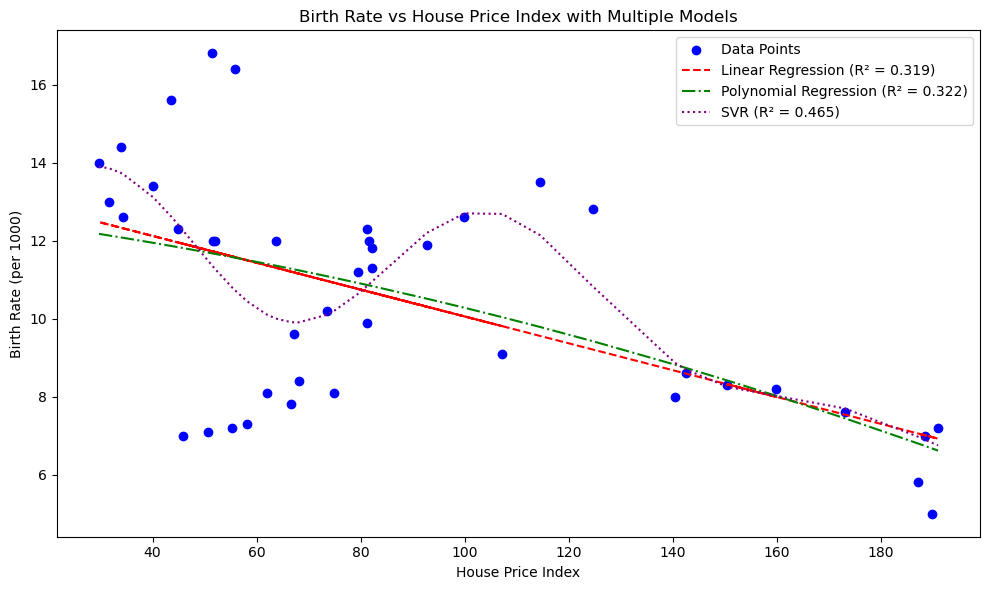

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import numpy as np

# 确保 house_prices 和 birth_rates 是 NumPy 数组
house_prices = np.array(house_prices)
birth_rates = np.array(birth_rates)

# 1. 多项式回归 (Polynomial Regression)
poly = PolynomialFeatures(degree=2)
house_prices_poly = poly.fit_transform(house_prices.reshape(-1, 1))
poly_reg = LinearRegression()
poly_reg.fit(house_prices_poly, birth_rates)
poly_pred = poly_reg.predict(house_prices_poly)
r2_poly = r2_score(birth_rates, poly_pred)
print(f"Polynomial Regression (degree=2) R-squared: {r2_poly:.3f}")

# 2. 支持向量回归 (SVR)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(house_prices.reshape(-1, 1), birth_rates)
svr_pred = svr.predict(house_prices.reshape(-1, 1))
r2_svr = r2_score(birth_rates, svr_pred)
print(f"SVR (RBF kernel) R-squared: {r2_svr:.3f}")

# 可视化所有模型的预测
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(house_prices, birth_rates, color='blue', label='Data Points')

# 线性回归（之前计算的）
ax.plot(house_prices, regression_line, color='red', linestyle='--', 
        label=f'Linear Regression (R² = {r_value**2:.3f})')

# 多项式回归
sorted_indices = np.argsort(house_prices)
ax.plot(house_prices[sorted_indices], poly_pred[sorted_indices], color='green', linestyle='-.', 
        label=f'Polynomial Regression (R² = {r2_poly:.3f})')

# SVR
ax.plot(house_prices[sorted_indices], svr_pred[sorted_indices], color='purple', linestyle=':', 
        label=f'SVR (R² = {r2_svr:.3f})')

ax.set_xlabel('House Price Index')
ax.set_ylabel('Birth Rate (per 1000)')
ax.set_title('Birth Rate vs House Price Index with Multiple Models')
ax.legend()
fig.tight_layout()

# 显示图表
plt.show()


In [6]:
df = pd.read_csv('data-hou.csv')  # Assumes file name is hou-data.csv
df['observation_date'] = pd.to_datetime(df['observation_date'])  # Convert to datetime
df['year'] = df['observation_date'].dt.year 
df

,observation_date,QHKR628BIS,year
0,1979-10-01,46.7371,1979
1,1980-01-01,49.4687,1980
2,1980-04-01,48.7067,1980
3,1980-07-01,51.8077,1980
4,1980-10-01,56.1242,1980
...,...,...,...
176,2023-10-01,145.3754,2023
177,2024-01-01,140.2602,2024
178,2024-04-01,140.8883,2024
179,2024-07-01,132.9822,2024


In [8]:
import csv
from collections import defaultdict

# 用于存储每年数据的字典
yearly_data = defaultdict(list)

# 读取数据
with open('QHKR628BIS.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # 提取年份
        year = row['observation_date'][:4]
        # 将数值添加到对应年份的列表
        yearly_data[year].append(float(row['QHKR628BIS']))

# 计算每年的平均值
yearly_averages = {}
for year, values in yearly_data.items():
    yearly_averages[year] = sum(values) / len(values)

# 写入新的 CSV 文件
with open('output_yearly_average.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # 写入表头
    writer.writerow(['year', 'QHKR628BIS_average'])
    # 写入数据
    for year in sorted(yearly_averages.keys()):
        writer.writerow([year, f"{yearly_averages[year]:.6f}"])

print("已生成新的 CSV 文件：output_yearly_average.csv")


已生成新的 CSV 文件：output_yearly_average.csv


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 读取数据
data = {
    'Year': [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Unemployment rate': [3.2, 1.7, 1.4, 1.1, 1.3, 1.8, 2, 2, 1.9, 3.2, 2.8, 2.2, 4.7, 6.2, 4.9, 5.1, 7.3, 7.9, 6.8, 5.6, 4.8, 4, 3.5, 5.3, 4.3, 3.4, 3.3, 3.4, 3.3, 3.3, 3.4, 3.1, 2.8, 2.9, 5.8, 5.2],
    'average marriage age': [27.28, 27.55, 27.85, 28.05, 28.21, 28.28, 28.41, 28.62, 28.63, 28.94, 29.03, 28.84, 29.05, 29.16, 29.43, 29.59, 29.83, 30.04, 30.36, 30.50, 30.42, 30.48, 30.49, 30.54, 30.71, 30.73, 30.77, 30.89, 30.95, 31.08, 31.20, 31.39, 31.50, 31.71, 32.13, 32.35],
    'Marriage rate': [6.8, 7.8, 7.4, 6.8, 7.5, 6.9, 7.5, 6.8, 6.1, 6.1, 5.5, 5.7, 4.8, 4.7, 4.6, 4.8, 4.7, 5.2, 6.1, 6.3, 7.3, 6.8, 6.8, 7.3, 7.5, 8.2, 8.4, 7.7, 7.8, 7.1, 6.8, 7, 6.6, 5.9, 3.7, 3.6],
    'GDP': [7435, 9071, 10610, 12098, 13486, 15466, 17976, 20396, 22503, 23497, 24818, 27330, 25809, 25092, 25757, 25230, 24666, 23977, 24928, 26650, 28224, 30594, 31516, 30698, 32550, 35142, 36731, 38404, 40315, 42432, 43734, 46160, 48538, 48359, 46109, 49771],
    'Housing price': [34.36, 40.10, 44.99, 51.61, 52.08, 63.71, 81.33, 81.57, 92.73, 79.46, 81.27, 107.22, 74.83, 66.55, 61.93, 55.28, 50.67, 45.81, 58.25, 68.12, 67.26, 73.57, 82.20, 82.20, 99.99, 114.57, 124.67, 140.48, 142.51, 159.98, 150.55, 173.10, 191.06, 188.46, 187.14, 189.81],
    'Fertility rate': [12.6, 13.4, 12.3, 12, 12, 12, 12.3, 12, 11.9, 11.2, 9.9, 9.1, 8.1, 7.8, 8.1, 7.2, 7.1, 7, 7.3, 8.4, 9.6, 10.2, 11.3, 11.8, 12.6, 13.5, 12.8, 8, 8.6, 8.2, 8.3, 7.6, 7.2, 7, 5.8, 5]
}
df = pd.DataFrame(data)

# 删除年份列，因为它不是分析的主要变量
df = df.drop('Year', axis=1)


C:\Users\baipi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baipi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baipi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baipi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baipi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_

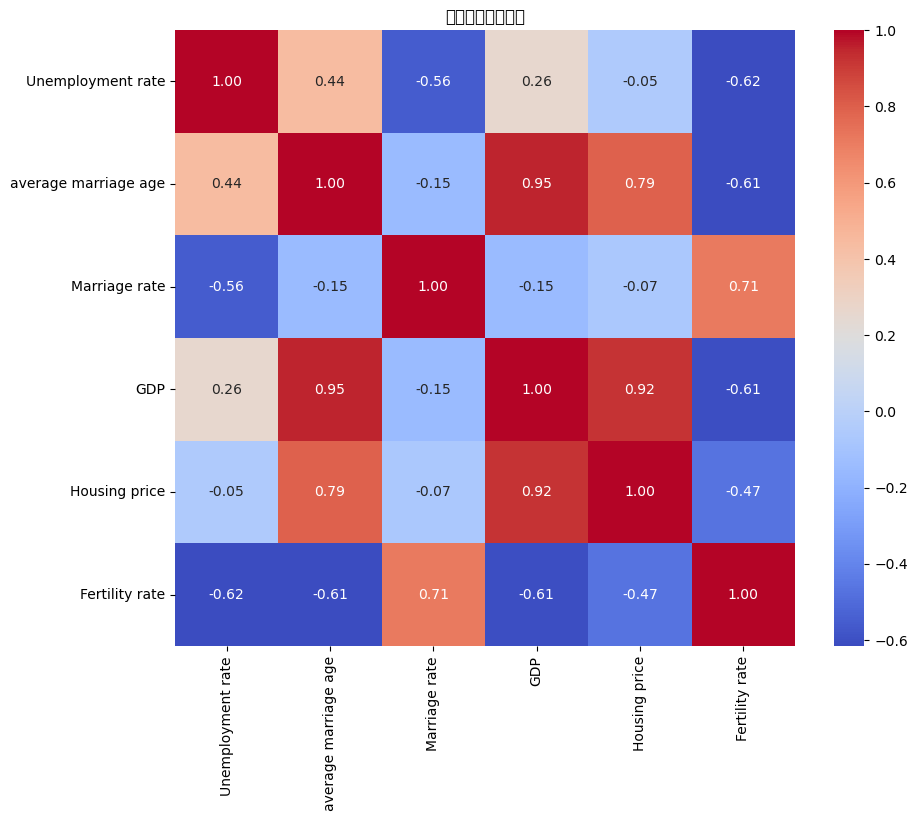

与生育率的相关系数：
Fertility rate          1.000000
Marriage rate           0.710772
Housing price          -0.470683
GDP                    -0.605256
average marriage age   -0.612980
Unemployment rate      -0.616220
Name: Fertility rate, dtype: float64


In [13]:
# 计算相关矩阵
correlation_matrix = df.corr()

# 绘制相关矩阵热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('相关系数矩阵热图')
plt.show()

# 打印与生育率的相关系数
print("与生育率的相关系数：")
print(correlation_matrix['Fertility rate'].sort_values(ascending=False))


In [17]:
# 简单线性回归：房价 vs 生育率
X_simple = df[['Housing price']]
y = df['Fertility rate']

model_simple = LinearRegression()
model_simple.fit(X_simple, y)

print(f"简单线性回归 - 斜率: {model_simple.coef_[0]:.4f}")
print(f"截距: {model_simple.intercept_:.4f}")
print(f"R² 分数: {model_simple.score(X_simple, y):.4f}")


简单线性回归 - 斜率: -0.0236
截距: 11.9675
R² 分数: 0.2215


In [19]:
# 多元线性回归
X_multi = df.drop('Fertility rate', axis=1)
y = df['Fertility rate']

# 添加常数项用于statsmodels
X_multi_sm = sm.add_constant(X_multi)
model_multi_sm = sm.OLS(y, X_multi_sm).fit()

# 输出回归结果
print(model_multi_sm.summary())

# 用sklearn进行多元线性回归
model_multi = LinearRegression()
model_multi.fit(X_multi, y)
print(f"多元线性回归 - R² 分数: {model_multi.score(X_multi, y):.4f}")

                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           2.93e-09
Time:                        15:27:06   Log-Likelihood:                -54.452
No. Observations:                  36   AIC:                             120.9
Df Residuals:                      30   BIC:                             130.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0832 

In [21]:
# 中介效应分析：GDP -> Marriage rate -> Fertility rate
# 步骤1：GDP对Marriage rate的回归
X1 = sm.add_constant(df[['GDP']])
model1 = sm.OLS(df['Marriage rate'], X1).fit()

# 步骤2：GDP和Marriage rate对Fertility rate的回归
X2 = sm.add_constant(df[['GDP', 'Marriage rate']])
model2 = sm.OLS(y, X2).fit()

print("中介效应 - 步骤1（GDP -> Marriage rate）：")
print(model1.summary())
print("中介效应 - 步骤2（GDP + Marriage rate -> Fertility rate）：")
print(model2.summary())

中介效应 - 步骤1（GDP -> Marriage rate）：
                            OLS Regression Results                            
Dep. Variable:          Marriage rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8085
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.375
Time:                        15:27:37   Log-Likelihood:                -57.870
No. Observations:                  36   AIC:                             119.7
Df Residuals:                      34   BIC:                             122.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8

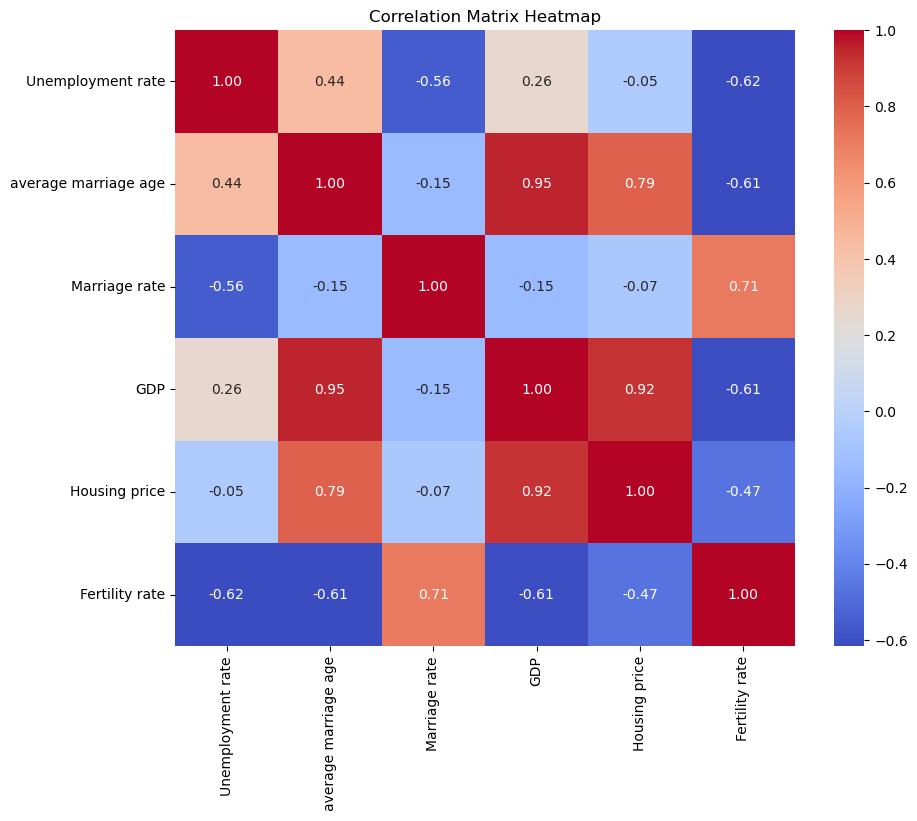

Correlation with Fertility rate:
Fertility rate          1.000000
Marriage rate           0.710772
Housing price          -0.470683
GDP                    -0.605256
average marriage age   -0.612980
Unemployment rate      -0.616220
Name: Fertility rate, dtype: float64
Simple Linear Regression - Slope: -0.0236
Intercept: 11.9675
R² Score: 0.2215


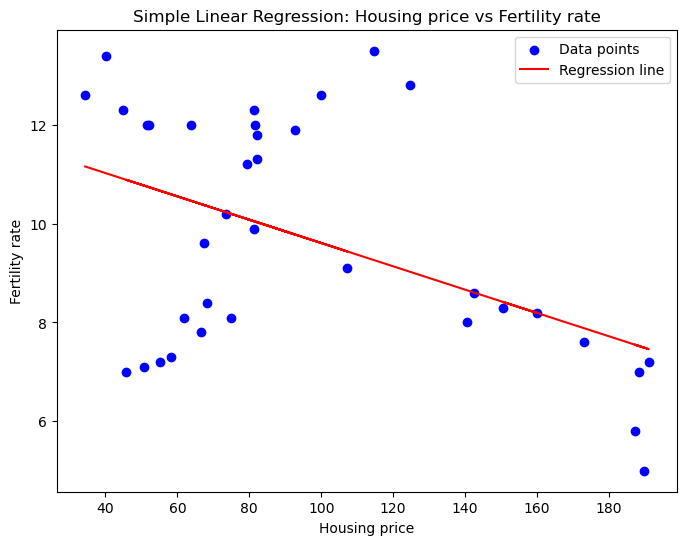

                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           2.93e-09
Time:                        15:31:51   Log-Likelihood:                -54.452
No. Observations:                  36   AIC:                             120.9
Df Residuals:                      30   BIC:                             130.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0832 

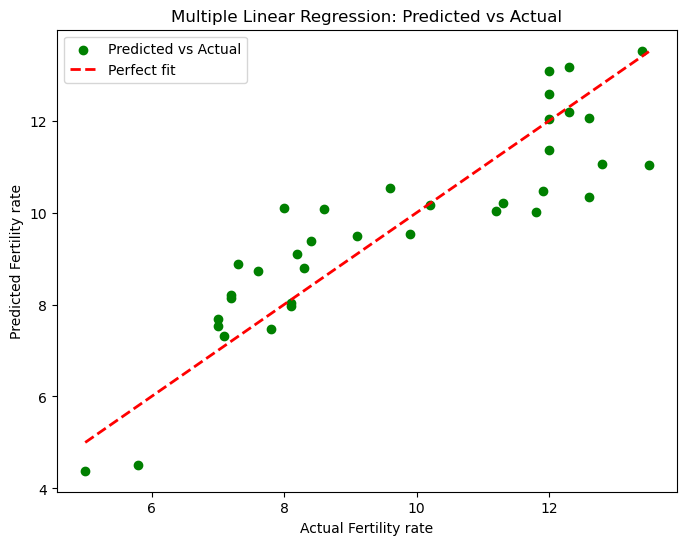

Moderation Analysis Results:
                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     7.346
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           0.000702
Time:                        15:31:51   Log-Likelihood:                -72.873
No. Observations:                  36   AIC:                             153.7
Df Residuals:                      32   BIC:                             160.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

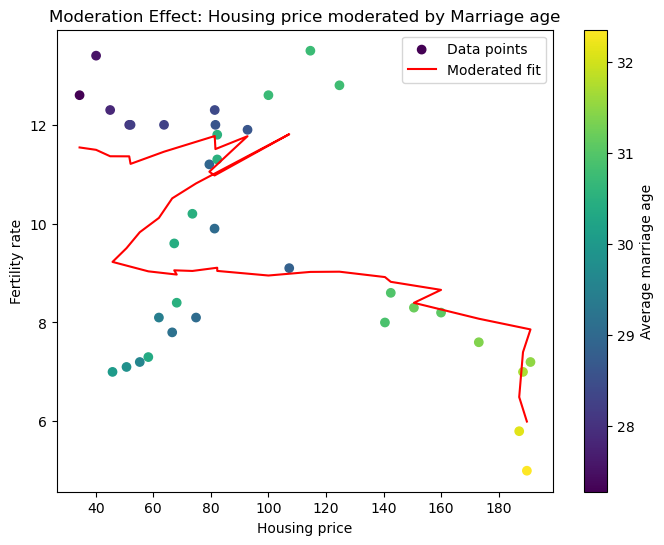

Mediation Step 1 (GDP -> Marriage rate):
                            OLS Regression Results                            
Dep. Variable:          Marriage rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8085
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.375
Time:                        15:31:51   Log-Likelihood:                -57.870
No. Observations:                  36   AIC:                             119.7
Df Residuals:                      34   BIC:                             122.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

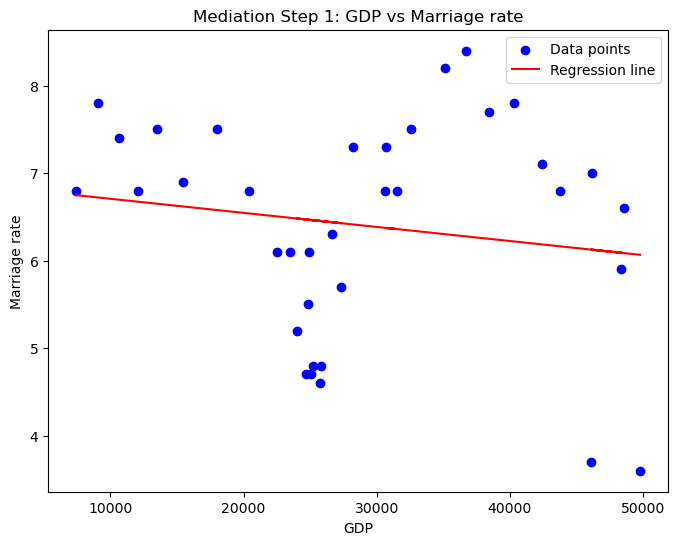

Mediation Step 2 (GDP + Marriage rate -> Fertility rate):
                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     51.68
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           6.80e-11
Time:                        15:31:51   Log-Likelihood:                -56.765
No. Observations:                  36   AIC:                             119.5
Df Residuals:                      33   BIC:                             124.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

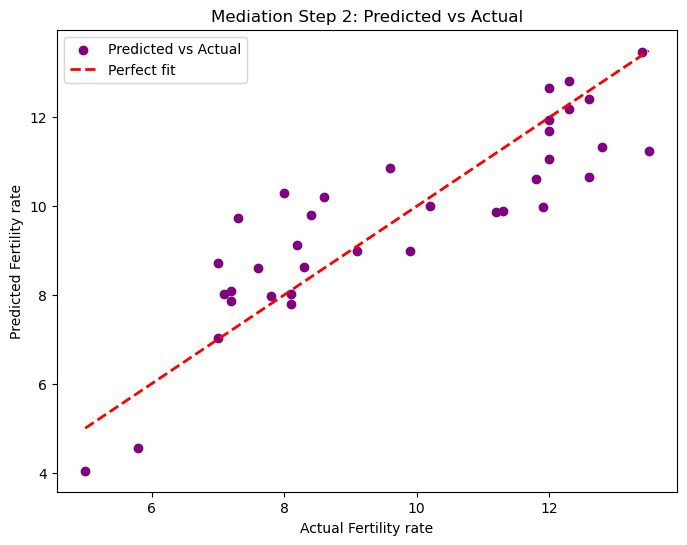

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 1. Data Import and Preprocessing
data = {
    'Year': [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Unemployment rate': [3.2, 1.7, 1.4, 1.1, 1.3, 1.8, 2, 2, 1.9, 3.2, 2.8, 2.2, 4.7, 6.2, 4.9, 5.1, 7.3, 7.9, 6.8, 5.6, 4.8, 4, 3.5, 5.3, 4.3, 3.4, 3.3, 3.4, 3.3, 3.3, 3.4, 3.1, 2.8, 2.9, 5.8, 5.2],
    'average marriage age': [27.28, 27.55, 27.85, 28.05, 28.21, 28.28, 28.41, 28.62, 28.63, 28.94, 29.03, 28.84, 29.05, 29.16, 29.43, 29.59, 29.83, 30.04, 30.36, 30.50, 30.42, 30.48, 30.49, 30.54, 30.71, 30.73, 30.77, 30.89, 30.95, 31.08, 31.20, 31.39, 31.50, 31.71, 32.13, 32.35],
    'Marriage rate': [6.8, 7.8, 7.4, 6.8, 7.5, 6.9, 7.5, 6.8, 6.1, 6.1, 5.5, 5.7, 4.8, 4.7, 4.6, 4.8, 4.7, 5.2, 6.1, 6.3, 7.3, 6.8, 6.8, 7.3, 7.5, 8.2, 8.4, 7.7, 7.8, 7.1, 6.8, 7, 6.6, 5.9, 3.7, 3.6],
    'GDP': [7435, 9071, 10610, 12098, 13486, 15466, 17976, 20396, 22503, 23497, 24818, 27330, 25809, 25092, 25757, 25230, 24666, 23977, 24928, 26650, 28224, 30594, 31516, 30698, 32550, 35142, 36731, 38404, 40315, 42432, 43734, 46160, 48538, 48359, 46109, 49771],
    'Housing price': [34.36, 40.10, 44.99, 51.61, 52.08, 63.71, 81.33, 81.57, 92.73, 79.46, 81.27, 107.22, 74.83, 66.55, 61.93, 55.28, 50.67, 45.81, 58.25, 68.12, 67.26, 73.57, 82.20, 82.20, 99.99, 114.57, 124.67, 140.48, 142.51, 159.98, 150.55, 173.10, 191.06, 188.46, 187.14, 189.81],
    'Fertility rate': [12.6, 13.4, 12.3, 12, 12, 12, 12.3, 12, 11.9, 11.2, 9.9, 9.1, 8.1, 7.8, 8.1, 7.2, 7.1, 7, 7.3, 8.4, 9.6, 10.2, 11.3, 11.8, 12.6, 13.5, 12.8, 8, 8.6, 8.2, 8.3, 7.6, 7.2, 7, 5.8, 5]
}
df = pd.DataFrame(data)
df = df.drop('Year', axis=1)

# 2. Correlation Matrix Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
print("Correlation with Fertility rate:")
print(correlation_matrix['Fertility rate'].sort_values(ascending=False))

# 3. Simple Linear Regression (Housing price vs Fertility rate)
X_simple = df[['Housing price']]
y = df['Fertility rate']
model_simple = LinearRegression()
model_simple.fit(X_simple, y)
y_pred_simple = model_simple.predict(X_simple)

print(f"Simple Linear Regression - Slope: {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")
print(f"R² Score: {model_simple.score(X_simple, y):.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_simple, y, color='blue', label='Data points')
plt.plot(X_simple, y_pred_simple, color='red', label='Regression line')
plt.xlabel('Housing price')
plt.ylabel('Fertility rate')
plt.title('Simple Linear Regression: Housing price vs Fertility rate')
plt.legend()
plt.show()

# 4. Multiple Linear Regression
X_multi = df.drop('Fertility rate', axis=1)
X_multi_sm = sm.add_constant(X_multi)
model_multi_sm = sm.OLS(y, X_multi_sm).fit()
y_pred_multi = model_multi_sm.predict(X_multi_sm)

print(model_multi_sm.summary())

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_multi, color='green', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect fit')
plt.xlabel('Actual Fertility rate')
plt.ylabel('Predicted Fertility rate')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()

# 5. Moderation Analysis (Housing price moderated by average marriage age)
df['Housing_price_x_Marriage_age'] = df['Housing price'] * df['average marriage age']
X_moderation = df[['Housing price', 'average marriage age', 'Housing_price_x_Marriage_age']]
X_moderation_sm = sm.add_constant(X_moderation)
model_moderation = sm.OLS(y, X_moderation_sm).fit()
y_pred_moderation = model_moderation.predict(X_moderation_sm)

print("Moderation Analysis Results:")
print(model_moderation.summary())

plt.figure(figsize=(8, 6))
plt.scatter(df['Housing price'], y, c=df['average marriage age'], cmap='viridis', label='Data points')
plt.plot(df['Housing price'], y_pred_moderation, color='red', label='Moderated fit')
plt.xlabel('Housing price')
plt.ylabel('Fertility rate')
plt.title('Moderation Effect: Housing price moderated by Marriage age')
plt.colorbar(label='Average marriage age')
plt.legend()
plt.show()

# 6. Mediation Analysis (GDP -> Marriage rate -> Fertility rate)
# Step 1: GDP -> Marriage rate
X1 = sm.add_constant(df[['GDP']])
model1 = sm.OLS(df['Marriage rate'], X1).fit()
marriage_pred = model1.predict(X1)

print("Mediation Step 1 (GDP -> Marriage rate):")
print(model1.summary())

plt.figure(figsize=(8, 6))
plt.scatter(df['GDP'], df['Marriage rate'], color='blue', label='Data points')
plt.plot(df['GDP'], marriage_pred, color='red', label='Regression line')
plt.xlabel('GDP')
plt.ylabel('Marriage rate')
plt.title('Mediation Step 1: GDP vs Marriage rate')
plt.legend()
plt.show()

# Step 2: GDP + Marriage rate -> Fertility rate
X2 = sm.add_constant(df[['GDP', 'Marriage rate']])
model2 = sm.OLS(y, X2).fit()
y_pred_mediation = model2.predict(X2)

print("Mediation Step 2 (GDP + Marriage rate -> Fertility rate):")
print(model2.summary())

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_mediation, color='purple', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect fit')
plt.xlabel('Actual Fertility rate')
plt.ylabel('Predicted Fertility rate')
plt.title('Mediation Step 2: Predicted vs Actual')
plt.legend()
plt.show()


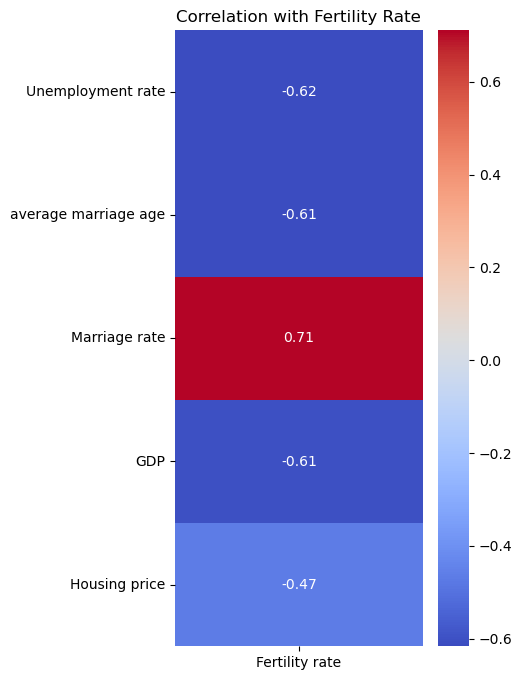

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
data = {
    'Year': [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Unemployment rate': [3.2, 1.7, 1.4, 1.1, 1.3, 1.8, 2, 2, 1.9, 3.2, 2.8, 2.2, 4.7, 6.2, 4.9, 5.1, 7.3, 7.9, 6.8, 5.6, 4.8, 4, 3.5, 5.3, 4.3, 3.4, 3.3, 3.4, 3.3, 3.3, 3.4, 3.1, 2.8, 2.9, 5.8, 5.2],
    'average marriage age': [27.28, 27.55, 27.85, 28.05, 28.21, 28.28, 28.41, 28.62, 28.63, 28.94, 29.03, 28.84, 29.05, 29.16, 29.43, 29.59, 29.83, 30.04, 30.36, 30.50, 30.42, 30.48, 30.49, 30.54, 30.71, 30.73, 30.77, 30.89, 30.95, 31.08, 31.20, 31.39, 31.50, 31.71, 32.13, 32.35],
    'Marriage rate': [6.8, 7.8, 7.4, 6.8, 7.5, 6.9, 7.5, 6.8, 6.1, 6.1, 5.5, 5.7, 4.8, 4.7, 4.6, 4.8, 4.7, 5.2, 6.1, 6.3, 7.3, 6.8, 6.8, 7.3, 7.5, 8.2, 8.4, 7.7, 7.8, 7.1, 6.8, 7, 6.6, 5.9, 3.7, 3.6],
    'GDP': [7435, 9071, 10610, 12098, 13486, 15466, 17976, 20396, 22503, 23497, 24818, 27330, 25809, 25092, 25757, 25230, 24666, 23977, 24928, 26650, 28224, 30594, 31516, 30698, 32550, 35142, 36731, 38404, 40315, 42432, 43734, 46160, 48538, 48359, 46109, 49771],
    'Housing price': [34.36, 40.10, 44.99, 51.61, 52.08, 63.71, 81.33, 81.57, 92.73, 79.46, 81.27, 107.22, 74.83, 66.55, 61.93, 55.28, 50.67, 45.81, 58.25, 68.12, 67.26, 73.57, 82.20, 82.20, 99.99, 114.57, 124.67, 140.48, 142.51, 159.98, 150.55, 173.10, 191.06, 188.46, 187.14, 189.81],
    'Fertility rate': [12.6, 13.4, 12.3, 12, 12, 12, 12.3, 12, 11.9, 11.2, 9.9, 9.1, 8.1, 7.8, 8.1, 7.2, 7.1, 7, 7.3, 8.4, 9.6, 10.2, 11.3, 11.8, 12.6, 13.5, 12.8, 8, 8.6, 8.2, 8.3, 7.6, 7.2, 7, 5.8, 5]
}
df = pd.DataFrame(data)
df = df.drop('Year', axis=1)

# Calculate correlation matrix and extract only Fertility rate column
correlation_matrix = df.corr()
fertility_corr = correlation_matrix[['Fertility rate']].drop('Fertility rate')

# Plot heatmap for Fertility rate correlations
plt.figure(figsize=(4, 8))
sns.heatmap(fertility_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation with Fertility Rate')
plt.show()


Step 1: Zᵢ = α₀ + α₁Xᵢ + rᵢ (GDP -> Marriage rate)
α₀ (Intercept) = 6.8685
α₁ (GDP coef) = -0.000016
R² = 0.0232



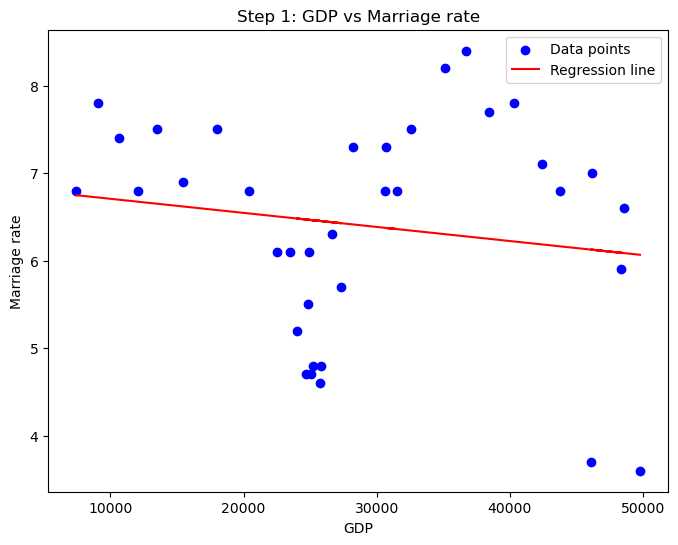

Step 2: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ (GDP + Marriage rate -> Fertility rate)
β₀ (Intercept) = 4.8078
β₁ (GDP coef) = -0.000105
γ (Marriage rate coef) = 1.2338
R² = 0.7580


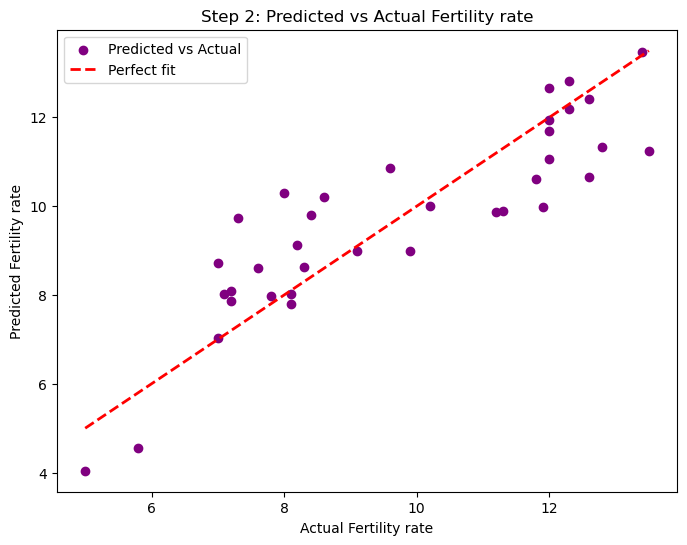

In [27]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data preparation
data = {
    'Year': [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Unemployment rate': [3.2, 1.7, 1.4, 1.1, 1.3, 1.8, 2, 2, 1.9, 3.2, 2.8, 2.2, 4.7, 6.2, 4.9, 5.1, 7.3, 7.9, 6.8, 5.6, 4.8, 4, 3.5, 5.3, 4.3, 3.4, 3.3, 3.4, 3.3, 3.3, 3.4, 3.1, 2.8, 2.9, 5.8, 5.2],
    'average marriage age': [27.28, 27.55, 27.85, 28.05, 28.21, 28.28, 28.41, 28.62, 28.63, 28.94, 29.03, 28.84, 29.05, 29.16, 29.43, 29.59, 29.83, 30.04, 30.36, 30.50, 30.42, 30.48, 30.49, 30.54, 30.71, 30.73, 30.77, 30.89, 30.95, 31.08, 31.20, 31.39, 31.50, 31.71, 32.13, 32.35],
    'Marriage rate': [6.8, 7.8, 7.4, 6.8, 7.5, 6.9, 7.5, 6.8, 6.1, 6.1, 5.5, 5.7, 4.8, 4.7, 4.6, 4.8, 4.7, 5.2, 6.1, 6.3, 7.3, 6.8, 6.8, 7.3, 7.5, 8.2, 8.4, 7.7, 7.8, 7.1, 6.8, 7, 6.6, 5.9, 3.7, 3.6],
    'GDP': [7435, 9071, 10610, 12098, 13486, 15466, 17976, 20396, 22503, 23497, 24818, 27330, 25809, 25092, 25757, 25230, 24666, 23977, 24928, 26650, 28224, 30594, 31516, 30698, 32550, 35142, 36731, 38404, 40315, 42432, 43734, 46160, 48538, 48359, 46109, 49771],
    'Housing price': [34.36, 40.10, 44.99, 51.61, 52.08, 63.71, 81.33, 81.57, 92.73, 79.46, 81.27, 107.22, 74.83, 66.55, 61.93, 55.28, 50.67, 45.81, 58.25, 68.12, 67.26, 73.57, 82.20, 82.20, 99.99, 114.57, 124.67, 140.48, 142.51, 159.98, 150.55, 173.10, 191.06, 188.46, 187.14, 189.81],
    'Fertility rate': [12.6, 13.4, 12.3, 12, 12, 12, 12.3, 12, 11.9, 11.2, 9.9, 9.1, 8.1, 7.8, 8.1, 7.2, 7.1, 7, 7.3, 8.4, 9.6, 10.2, 11.3, 11.8, 12.6, 13.5, 12.8, 8, 8.6, 8.2, 8.3, 7.6, 7.2, 7, 5.8, 5]
}
df = pd.DataFrame(data)
df = df.drop('Year', axis=1)

# Define variables
X = df['GDP']  # Independent variable (X)
Z = df['Marriage rate']  # Mediator (Z)
Y = df['Fertility rate']  # Dependent variable (Y)

# Step 1: Z = α₀ + α₁X + rᵢ (GDP -> Marriage rate)
X1 = sm.add_constant(X)
model1 = sm.OLS(Z, X1).fit()
alpha_0 = model1.params['const']  # Intercept
alpha_1 = model1.params['GDP']    # Slope
Z_pred = model1.predict(X1)

print("Step 1: Zᵢ = α₀ + α₁Xᵢ + rᵢ (GDP -> Marriage rate)")
print(f"α₀ (Intercept) = {alpha_0:.4f}")
print(f"α₁ (GDP coef) = {alpha_1:.6f}")
print(f"R² = {model1.rsquared:.4f}\n")

# Plot Step 1
plt.figure(figsize=(8, 6))
plt.scatter(X, Z, color='blue', label='Data points')
plt.plot(X, Z_pred, color='red', label='Regression line')
plt.xlabel('GDP')
plt.ylabel('Marriage rate')
plt.title('Step 1: GDP vs Marriage rate')
plt.legend()
plt.show()

# Step 2: Y = β₀ + β₁X + γZ + eᵢ (GDP + Marriage rate -> Fertility rate)
X2 = sm.add_constant(df[['GDP', 'Marriage rate']])
model2 = sm.OLS(Y, X2).fit()
beta_0 = model2.params['const']         # Intercept
beta_1 = model2.params['GDP']           # Coefficient for X
gamma = model2.params['Marriage rate']  # Coefficient for Z
Y_pred = model2.predict(X2)

print("Step 2: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ (GDP + Marriage rate -> Fertility rate)")
print(f"β₀ (Intercept) = {beta_0:.4f}")
print(f"β₁ (GDP coef) = {beta_1:.6f}")
print(f"γ (Marriage rate coef) = {gamma:.4f}")
print(f"R² = {model2.rsquared:.4f}")

# Plot Step 2
plt.figure(figsize=(8, 6))
plt.scatter(Y, Y_pred, color='purple', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2, label='Perfect fit')
plt.xlabel('Actual Fertility rate')
plt.ylabel('Predicted Fertility rate')
plt.title('Step 2: Predicted vs Actual Fertility rate')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     28.53
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           6.38e-08
Time:                        19:38:25   Log-Likelihood:                -64.231
No. Observations:                  36   AIC:                             134.5
Df Residuals:                      33   BIC:                             139.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.4745      0.80

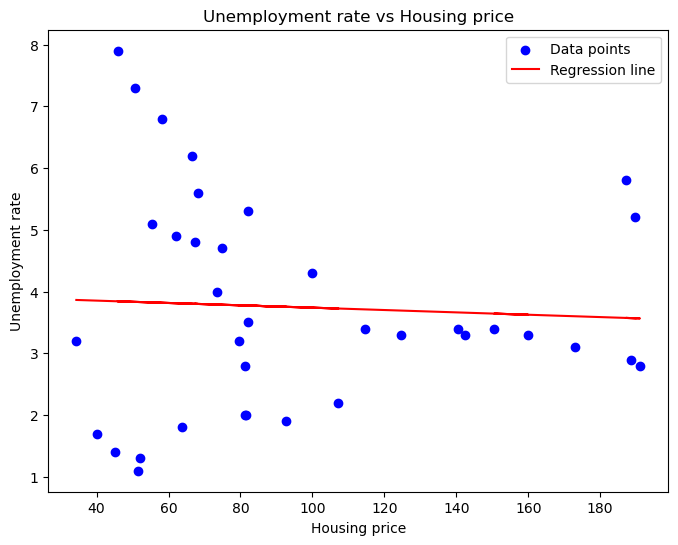


中间变量: Unemployment rate
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
α₀ (Intercept) = 3.9302
α₁ (Housing price coef) = -0.001904
R² = 0.0028
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
β₀ (Intercept) = 15.4745
β₁ (Housing price coef) = -0.025296
γ (Unemployment rate coef) = -0.8923
R² = 0.6336
                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     11.58
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           0.000155
Time:                        19:38:26   Log-Likelihood:                -72.732
No. Observations:                  36   AIC:                             151.5
Df Residuals:                      33   BIC:                             156.2
Df Model:                           2                                         
Covariance Type:          

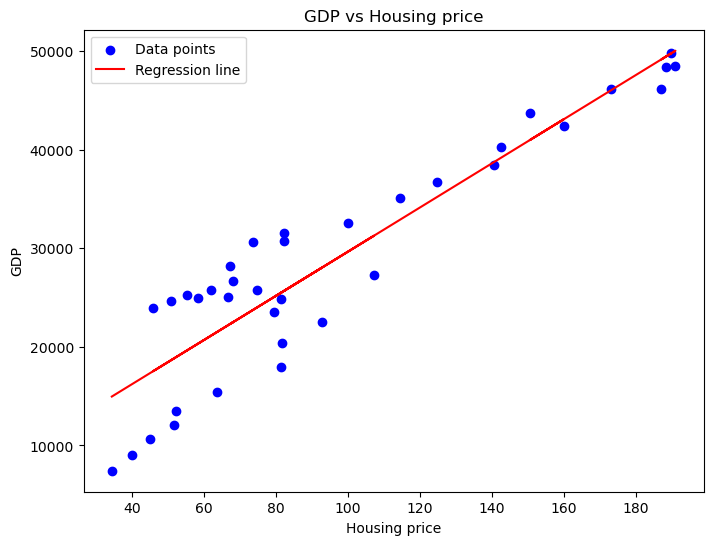


中间变量: GDP
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
α₀ (Intercept) = 7268.2557
α₁ (Housing price coef) = 223.856830
R² = 0.8431
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
β₀ (Intercept) = 13.6164
β₁ (Housing price coef) = 0.027187
γ (GDP coef) = -0.0002
R² = 0.4125
                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     35.75
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           5.49e-09
Time:                        19:38:26   Log-Likelihood:                -61.556
No. Observations:                  36   AIC:                             129.1
Df Residuals:                      33   BIC:                             133.9
Df Model:                           2                                         
Covariance Type:            nonrobust              

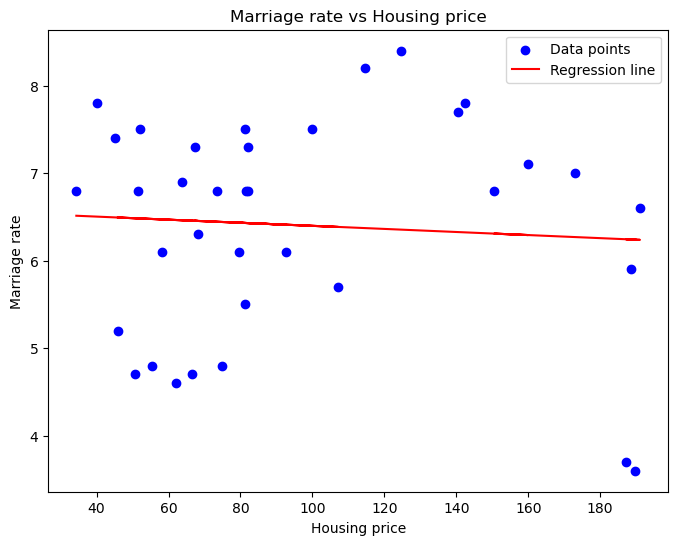


中间变量: Marriage rate
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
α₀ (Intercept) = 6.5745
α₁ (Housing price coef) = -0.001758
R² = 0.0047
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
β₀ (Intercept) = 3.2340
β₁ (Housing price coef) = -0.021261
γ (Marriage rate coef) = 1.3284
R² = 0.6842
                            OLS Regression Results                            
Dep. Variable:         Fertility rate   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.961
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           0.000413
Time:                        19:38:26   Log-Likelihood:                -73.803
No. Observations:                  36   AIC:                             153.6
Df Residuals:                      33   BIC:                             158.4
Df Model:                           2                                         
Covariance Type:            nonrobus

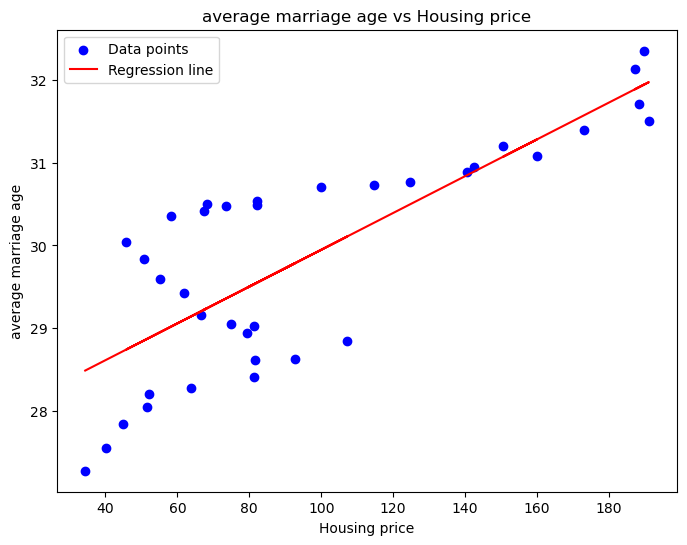


中间变量: average marriage age
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
α₀ (Intercept) = 27.7259
α₁ (Housing price coef) = 0.022217
R² = 0.6304
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
β₀ (Intercept) = 44.1230
β₁ (Housing price coef) = 0.002170
γ (average marriage age coef) = -1.1598
R² = 0.3764

参数总结表格:
| Intermediate Variable    | β₀       | β₁         | γ         | α₀       | α₁         |
|--------------------------|----------|------------|-----------|----------|------------|
| Unemployment rate       |  15.4745 |  -0.025296 |   -0.8923 |   3.9302 |  -0.001904 |
| GDP                     |  13.6164 |   0.027187 |   -0.0002 | 7268.2557 | 223.856830 |
| Marriage rate           |   3.2340 |  -0.021261 |    1.3284 |   6.5745 |  -0.001758 |
| average marriage age    |  44.1230 |   0.002170 |   -1.1598 |  27.7259 |   0.022217 |


In [43]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 数据准备
data = {
    'Year': [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Unemployment rate': [3.2, 1.7, 1.4, 1.1, 1.3, 1.8, 2, 2, 1.9, 3.2, 2.8, 2.2, 4.7, 6.2, 4.9, 5.1, 7.3, 7.9, 6.8, 5.6, 4.8, 4, 3.5, 5.3, 4.3, 3.4, 3.3, 3.4, 3.3, 3.3, 3.4, 3.1, 2.8, 2.9, 5.8, 5.2],
    'average marriage age': [27.28, 27.55, 27.85, 28.05, 28.21, 28.28, 28.41, 28.62, 28.63, 28.94, 29.03, 28.84, 29.05, 29.16, 29.43, 29.59, 29.83, 30.04, 30.36, 30.50, 30.42, 30.48, 30.49, 30.54, 30.71, 30.73, 30.77, 30.89, 30.95, 31.08, 31.20, 31.39, 31.50, 31.71, 32.13, 32.35],
    'Marriage rate': [6.8, 7.8, 7.4, 6.8, 7.5, 6.9, 7.5, 6.8, 6.1, 6.1, 5.5, 5.7, 4.8, 4.7, 4.6, 4.8, 4.7, 5.2, 6.1, 6.3, 7.3, 6.8, 6.8, 7.3, 7.5, 8.2, 8.4, 7.7, 7.8, 7.1, 6.8, 7, 6.6, 5.9, 3.7, 3.6],
    'GDP': [7435, 9071, 10610, 12098, 13486, 15466, 17976, 20396, 22503, 23497, 24818, 27330, 25809, 25092, 25757, 25230, 24666, 23977, 24928, 26650, 28224, 30594, 31516, 30698, 32550, 35142, 36731, 38404, 40315, 42432, 43734, 46160, 48538, 48359, 46109, 49771],
    'Housing price': [34.36, 40.10, 44.99, 51.61, 52.08, 63.71, 81.33, 81.57, 92.73, 79.46, 81.27, 107.22, 74.83, 66.55, 61.93, 55.28, 50.67, 45.81, 58.25, 68.12, 67.26, 73.57, 82.20, 82.20, 99.99, 114.57, 124.67, 140.48, 142.51, 159.98, 150.55, 173.10, 191.06, 188.46, 187.14, 189.81],
    'Fertility rate': [12.6, 13.4, 12.3, 12, 12, 12, 12.3, 12, 11.9, 11.2, 9.9, 9.1, 8.1, 7.8, 8.1, 7.2, 7.1, 7, 7.3, 8.4, 9.6, 10.2, 11.3, 11.8, 12.6, 13.5, 12.8, 8, 8.6, 8.2, 8.3, 7.6, 7.2, 7, 5.8, 5]
}
df = pd.DataFrame(data)
df = df.drop('Year', axis=1)

# 中间变量列表
mediators = ['Unemployment rate', 'GDP', 'Marriage rate', 'average marriage age']
X = df['Housing price']  # 自变量X（房价）
results = {}

# 对每个中间变量进行分析
for Z_var in mediators:
    Z = df[Z_var]  # 中间变量Z
    Y = df['Fertility rate']  # 因变量Y（生育率）

    # 第一步：Z = α₀ + α₁X + rᵢ
    X1 = sm.add_constant(X)
    model1 = sm.OLS(Z, X1).fit()
    alpha_0 = model1.params['const']
    alpha_1 = model1.params['Housing price']
    Z_pred = model1.predict(X1)

    # 第二步：Y = β₀ + β₁X + γZ + eᵢ
    X2 = sm.add_constant(df[['Housing price', Z_var]])
    model2 = sm.OLS(Y, X2).fit()
    beta_0 = model2.params['const']
    beta_1 = model2.params['Housing price']
    gamma = model2.params[Z_var]
    print(model2.summary())

    # 保存结果
    results[Z_var] = {
        'β₀': beta_0, 'β₁': beta_1, 'γ': gamma,
        'α₀': alpha_0, 'α₁': alpha_1
    }

    # 绘制中间变量Z对房价X的散点图
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Z, color='blue', label='Data points')
    plt.plot(X, Z_pred, color='red', label='Regression line')
    plt.xlabel('Housing price')
    plt.ylabel(Z_var)
    plt.title(f'{Z_var} vs Housing price')
    plt.legend()
    plt.show()

    print(f"\n中间变量: {Z_var}")
    print("第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ")
    print(f"α₀ (Intercept) = {alpha_0:.4f}")
    print(f"α₁ (Housing price coef) = {alpha_1:.6f}")
    print(f"R² = {model1.rsquared:.4f}")
    print("第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ")
    print(f"β₀ (Intercept) = {beta_0:.4f}")
    print(f"β₁ (Housing price coef) = {beta_1:.6f}")
    print(f"γ ({Z_var} coef) = {gamma:.4f}")
    print(f"R² = {model2.rsquared:.4f}")

# 总结表格
print("\n参数总结表格:")
print("| Intermediate Variable    | β₀       | β₁         | γ         | α₀       | α₁         |")
print("|--------------------------|----------|------------|-----------|----------|------------|")
for var in mediators:
    print(f"| {var:<23} | {results[var]['β₀']:>8.4f} | {results[var]['β₁']:>10.6f} | {results[var]['γ']:>9.4f} | {results[var]['α₀']:>8.4f} | {results[var]['α₁']:>10.6f} |")


In [33]:
import pandas as pd
import statsmodels.api as sm

# 数据准备（假设与之前一致）
data = {
    'Year': [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Unemployment rate': [3.2, 1.7, 1.4, 1.1, 1.3, 1.8, 2, 2, 1.9, 3.2, 2.8, 2.2, 4.7, 6.2, 4.9, 5.1, 7.3, 7.9, 6.8, 5.6, 4.8, 4, 3.5, 5.3, 4.3, 3.4, 3.3, 3.4, 3.3, 3.3, 3.4, 3.1, 2.8, 2.9, 5.8, 5.2],
    'average marriage age': [27.28, 27.55, 27.85, 28.05, 28.21, 28.28, 28.41, 28.62, 28.63, 28.94, 29.03, 28.84, 29.05, 29.16, 29.43, 29.59, 29.83, 30.04, 30.36, 30.50, 30.42, 30.48, 30.49, 30.54, 30.71, 30.73, 30.77, 30.89, 30.95, 31.08, 31.20, 31.39, 31.50, 31.71, 32.13, 32.35],
    'Marriage rate': [6.8, 7.8, 7.4, 6.8, 7.5, 6.9, 7.5, 6.8, 6.1, 6.1, 5.5, 5.7, 4.8, 4.7, 4.6, 4.8, 4.7, 5.2, 6.1, 6.3, 7.3, 6.8, 6.8, 7.3, 7.5, 8.2, 8.4, 7.7, 7.8, 7.1, 6.8, 7, 6.6, 5.9, 3.7, 3.6],
    'GDP': [7435, 9071, 10610, 12098, 13486, 15466, 17976, 20396, 22503, 23497, 24818, 27330, 25809, 25092, 25757, 25230, 24666, 23977, 24928, 26650, 28224, 30594, 31516, 30698, 32550, 35142, 36731, 38404, 40315, 42432, 43734, 46160, 48538, 48359, 46109, 49771],
    'Housing price': [34.36, 40.10, 44.99, 51.61, 52.08, 63.71, 81.33, 81.57, 92.73, 79.46, 81.27, 107.22, 74.83, 66.55, 61.93, 55.28, 50.67, 45.81, 58.25, 68.12, 67.26, 73.57, 82.20, 82.20, 99.99, 114.57, 124.67, 140.48, 142.51, 159.98, 150.55, 173.10, 191.06, 188.46, 187.14, 189.81],
    'Fertility rate': [12.6, 13.4, 12.3, 12, 12, 12, 12.3, 12, 11.9, 11.2, 9.9, 9.1, 8.1, 7.8, 8.1, 7.2, 7.1, 7, 7.3, 8.4, 9.6, 10.2, 11.3, 11.8, 12.6, 13.5, 12.8, 8, 8.6, 8.2, 8.3, 7.6, 7.2, 7, 5.8, 5]
}
df = pd.DataFrame(data)
df = df.drop('Year', axis=1)

# 中间变量列表
mediators = ['Unemployment rate', 'GDP', 'Marriage rate', 'average marriage age']
X = df['Housing price']  # 自变量X（房价）
Y = df['Fertility rate']  # 因变量Y（生育率）

# 对每个中间变量提取p值
for Z_var in mediators:
    Z = df[Z_var]  # 中间变量Z

    # 第一步：Z = α₀ + α₁X + rᵢ
    X1 = sm.add_constant(X)
    model1 = sm.OLS(Z, X1).fit()
    p_alpha_0 = model1.pvalues['const']
    p_alpha_1 = model1.pvalues['Housing price']

    # 第二步：Y = β₀ + β₁X + γZ + eᵢ
    X2 = sm.add_constant(df[['Housing price', Z_var]])
    model2 = sm.OLS(Y, X2).fit()
    p_beta_0 = model2.pvalues['const']
    p_beta_1 = model2.pvalues['Housing price']
    p_gamma = model2.pvalues[Z_var]

    # 输出p值
    print(f"\n中间变量: {Z_var}")
    print("第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ")
    print(f"p值 α₀ (Intercept) = {p_alpha_0:.4f}")
    print(f"p值 α₁ (Housing price) = {p_alpha_1:.4f}")
    print("第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ")
    print(f"p值 β₀ (Intercept) = {p_beta_0:.4f}")
    print(f"p值 β₁ (Housing price) = {p_beta_1:.4f}")
    print(f"p值 γ ({Z_var}) = {p_gamma:.4f}")



中间变量: Unemployment rate
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
p值 α₀ (Intercept) = 0.0000
p值 α₁ (Housing price) = 0.7601
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
p值 β₀ (Intercept) = 0.0000
p值 β₁ (Housing price) = 0.0000
p值 γ (Unemployment rate) = 0.0000

中间变量: GDP
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
p值 α₀ (Intercept) = 0.0002
p值 α₁ (Housing price) = 0.0000
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
p值 β₀ (Intercept) = 0.0000
p值 β₁ (Housing price) = 0.1170
p值 γ (GDP) = 0.0025

中间变量: Marriage rate
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
p值 α₀ (Intercept) = 0.0000
p值 α₁ (Housing price) = 0.6922
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
p值 β₀ (Intercept) = 0.0235
p值 β₁ (Housing price) = 0.0001
p值 γ (Marriage rate) = 0.0000

中间变量: average marriage age
第一步: Zᵢ = α₀ + α₁Xᵢ + rᵢ
p值 α₀ (Intercept) = 0.0000
p值 α₁ (Housing price) = 0.0000
第二步: Yᵢ = β₀ + β₁Xᵢ + γZᵢ + eᵢ
p值 β₀ (Intercept) = 0.0004
p值 β₁ (Housing price) = 0.8494
p值 γ (average marriage age) = 0.0072
